In [3]:
pip install tensorflow


     -------------------------------------- 284.1/284.1 MB 4.1 MB/s eta 0:00:00
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ------------------------------------- 938.6/938.6 kB 14.7 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 13.8 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-4.25.0-cp310-abi3-win_amd64.whl (413 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached te

In [4]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.neural_network import MLPClassifier

import os
from os import listdir
from PIL import Image
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
pip install tensorflow_hub

  Using cached tensorflow_hub-0.15.0-py2.py3-none-any.whl (85 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow_hub as hub
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [10]:
pip install opencv-python


  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        # Convert the file extension to lowercase before checking
        if any([filename.lower().endswith(x) for x in ['.jpeg', '.jpg', '.png']]):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the specified target size
                img = cv2.resize(img, target_size)
                class_label = os.path.basename(folder)  # Extract the class label from the folder name
                images.append((img, class_label))  # Include class label and file name in the tuple
    return images

images_dir1 = load_and_resize_images_from_folder('Bacterial leaf blight')
images_dir2 = load_and_resize_images_from_folder('Brown spot')
images_dir3 = load_and_resize_images_from_folder('Leaf smut')


In [12]:
images_dir1[0]  #Checking if it works fine

(array([[[210, 215, 229],
         [208, 214, 227],
         [209, 212, 227],
         ...,
         [210, 215, 230],
         [211, 217, 230],
         [211, 216, 229]],
 
        [[208, 214, 226],
         [208, 214, 227],
         [210, 214, 229],
         ...,
         [210, 215, 230],
         [209, 215, 228],
         [210, 215, 231]],
 
        [[209, 214, 228],
         [209, 214, 228],
         [208, 213, 230],
         ...,
         [209, 215, 228],
         [210, 216, 229],
         [211, 215, 233]],
 
        ...,
 
        [[210, 216, 229],
         [207, 215, 228],
         [209, 215, 228],
         ...,
         [210, 214, 225],
         [210, 216, 229],
         [210, 215, 228]],
 
        [[209, 215, 228],
         [207, 212, 227],
         [209, 216, 229],
         ...,
         [210, 214, 225],
         [209, 215, 229],
         [209, 215, 228]],
 
        [[208, 213, 227],
         [211, 214, 229],
         [209, 216, 229],
         ...,
         [211, 214, 227],
  

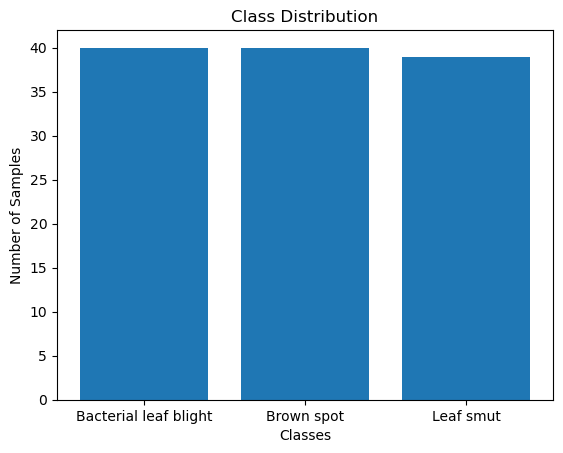

In [13]:
class_counts = {class_name: len(images) for class_name, images in {
    'Bacterial leaf blight': images_dir1,
    'Brown spot': images_dir2,
    'Leaf smut': images_dir3
}.items()}

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [14]:
no_of_samples = 15

dir1_set = images_dir1[:no_of_samples]
dir2_set = images_dir2[:no_of_samples]
dir3_set = images_dir3[:no_of_samples]

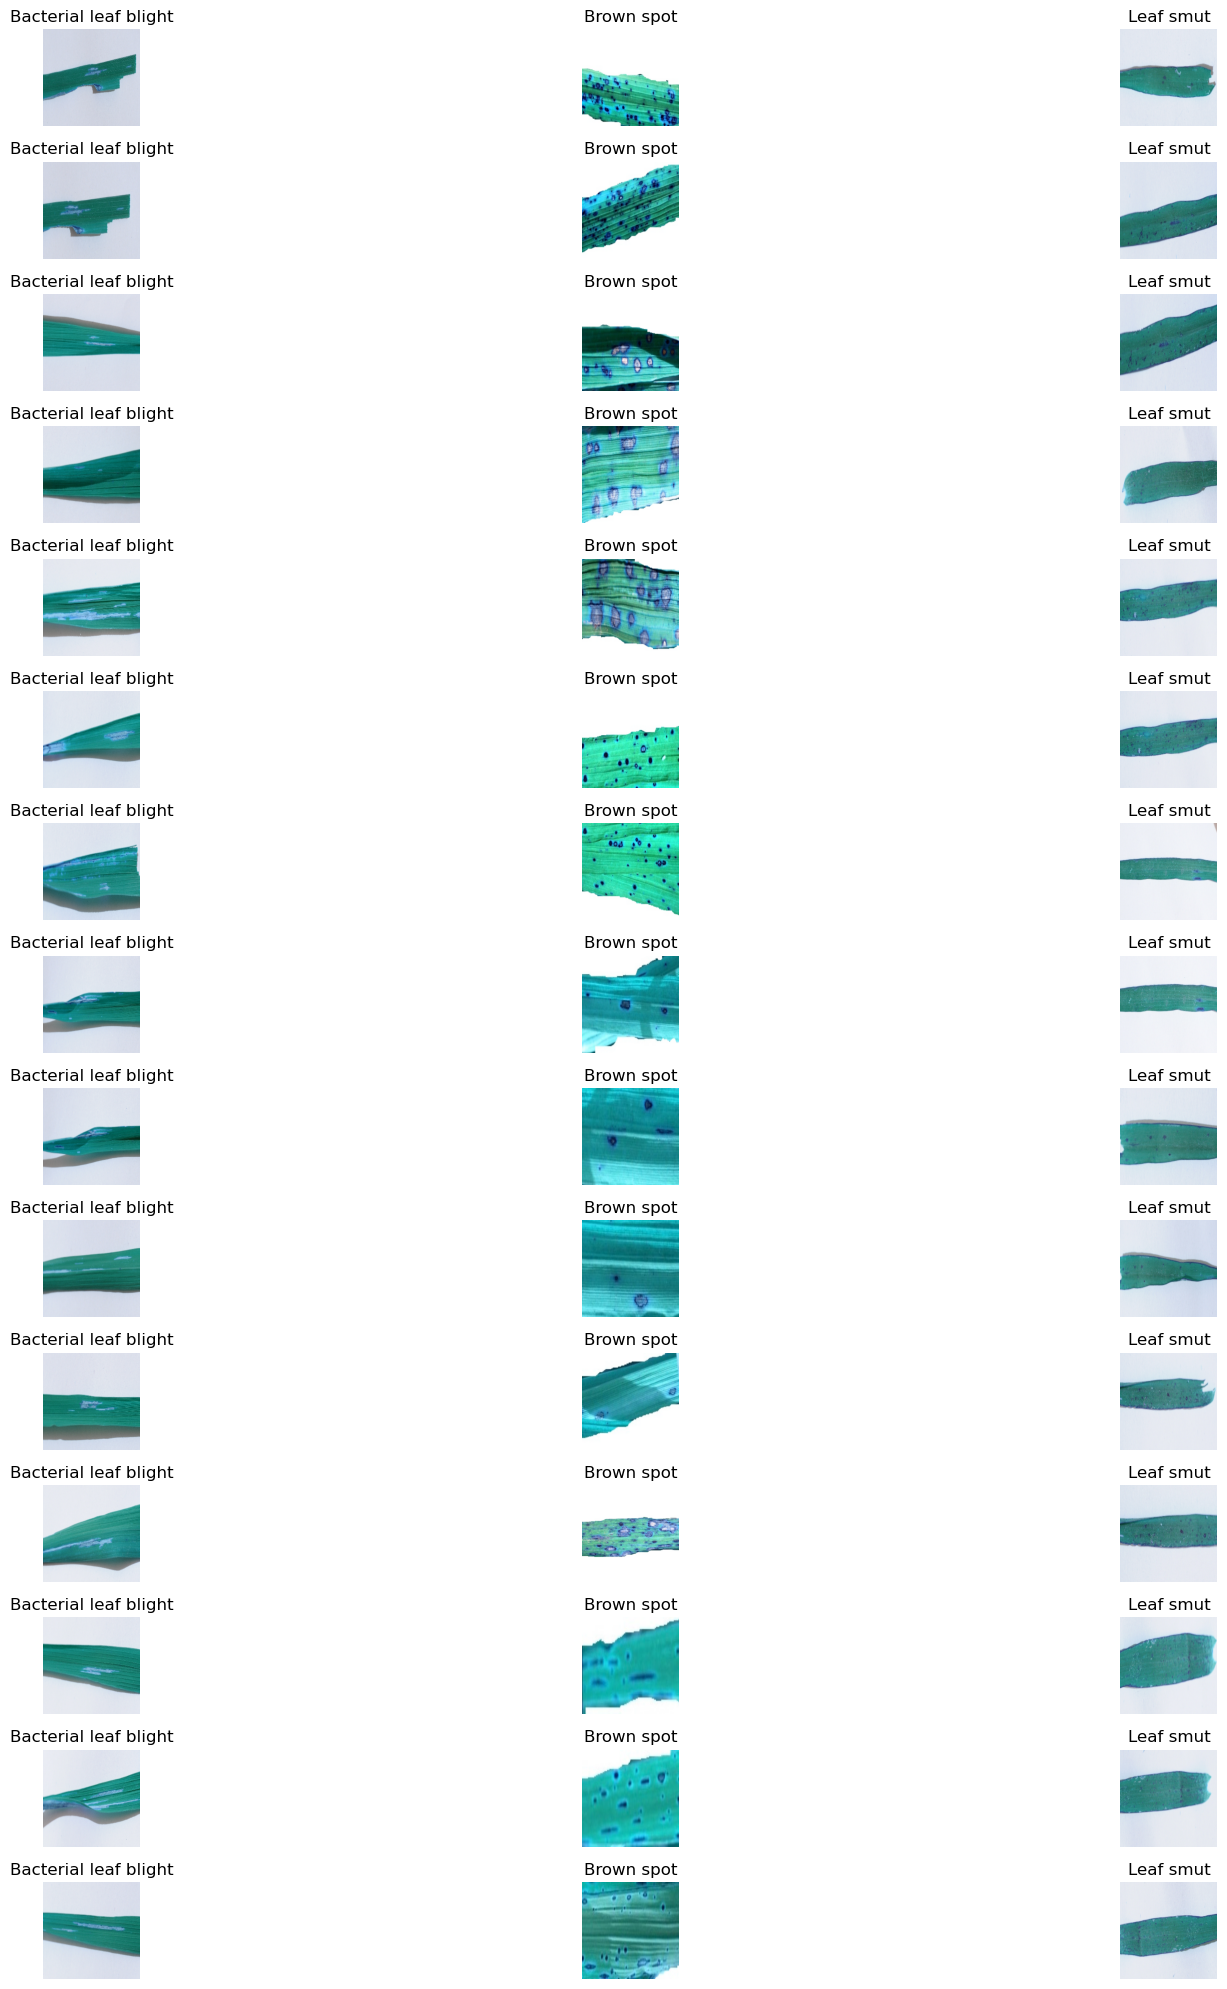

In [15]:
fig, axes = plt.subplots(nrows = no_of_samples, ncols = 3, figsize=(20,20))

for i in range(no_of_samples):
    axes[i,0].imshow(dir1_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')
    axes[i,0].axis('off')
    
    axes[i,1].imshow(dir2_set[i][0])
    axes[i,1].set_title('Brown spot')
    axes[i,1].axis('off')
    
    axes[i,2].imshow(dir3_set[i][0])
    axes[i,2].set_title('Leaf smut')
    axes[i,2].axis('off')
    
plt.tight_layout()
plt.show()

# Data Pre Processing

In [16]:
from tensorflow.keras.preprocessing.image import img_to_array

In [17]:
x_image = []
y_label = []

for img, class_label in images_dir1: 
    x_image.append(img)
    y_label.append(class_label)
    
for img, class_label in images_dir2:  
    x_image.append(img)
    y_label.append(class_label)
    
for img, class_label in images_dir3:
    x_image.append(img)
    y_label.append(class_label)


In [18]:
x_image

[array([[[210, 215, 229],
         [208, 214, 227],
         [209, 212, 227],
         ...,
         [210, 215, 230],
         [211, 217, 230],
         [211, 216, 229]],
 
        [[208, 214, 226],
         [208, 214, 227],
         [210, 214, 229],
         ...,
         [210, 215, 230],
         [209, 215, 228],
         [210, 215, 231]],
 
        [[209, 214, 228],
         [209, 214, 228],
         [208, 213, 230],
         ...,
         [209, 215, 228],
         [210, 216, 229],
         [211, 215, 233]],
 
        ...,
 
        [[210, 216, 229],
         [207, 215, 228],
         [209, 215, 228],
         ...,
         [210, 214, 225],
         [210, 216, 229],
         [210, 215, 228]],
 
        [[209, 215, 228],
         [207, 212, 227],
         [209, 216, 229],
         ...,
         [210, 214, 225],
         [209, 215, 229],
         [209, 215, 228]],
 
        [[208, 213, 227],
         [211, 214, 229],
         [209, 216, 229],
         ...,
         [211, 214, 227],
  

In [19]:
y_label

['Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial 

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [21]:
#converting image and labels to arrays
x_image =np.array(x_image)
y_label = np.array(y_label)

y_encoded = label_encoder.fit_transform(y_label)

In [22]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [23]:
x_image.shape

(119, 224, 224, 3)

In [24]:
x_image = x_image / 255.0

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_image, y_encoded, test_size=0.2, random_state=42)

In [26]:
print(x_train.shape)
print(y_train.shape)

(95, 224, 224, 3)
(95,)


In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  
])


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
3/3 [==============================] - 12s 4s/step - loss: 3.5527 - accuracy: 0.3947 - val_loss: 1.0618 - val_accuracy: 0.5263
Epoch 2/500
3/3 [==============================] - 10s 3s/step - loss: 1.2518 - accuracy: 0.3289 - val_loss: 1.1236 - val_accuracy: 0.2632
Epoch 3/500
3/3 [==============================] - 10s 3s/step - loss: 1.0700 - accuracy: 0.4737 - val_loss: 1.3132 - val_accuracy: 0.2105
Epoch 4/500
3/3 [==============================] - 10s 3s/step - loss: 1.1043 - accuracy: 0.4474 - val_loss: 1.1381 - val_accuracy: 0.2632
Epoch 5/500
3/3 [==============================] - 10s 3s/step - loss: 1.0377 - accuracy: 0.4868 - val_loss: 1.1113 - val_accuracy: 0.3158
Epoch 6/500
3/3 [==============================] - 10s 3s/step - loss: 0.8977 - accuracy: 0.5921 - val_loss: 1.1343 - val_accuracy: 0.3158
Epoch 7/500
3/3 [==============================] - 10s 3s/step - loss: 0.8468 - accuracy: 0.5263 - val_loss: 1.1850 - val_accuracy: 0.2105
Epoch 8/500
3/3 [==========

3/3 [==============================] - 9s 3s/step - loss: 0.1392 - accuracy: 0.9605 - val_loss: 1.0983 - val_accuracy: 0.7368
Epoch 60/500
3/3 [==============================] - 10s 3s/step - loss: 0.0724 - accuracy: 0.9737 - val_loss: 1.0099 - val_accuracy: 0.7368
Epoch 61/500
3/3 [==============================] - 10s 3s/step - loss: 0.0224 - accuracy: 0.9868 - val_loss: 0.9833 - val_accuracy: 0.7368
Epoch 62/500
3/3 [==============================] - 10s 3s/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.1169 - val_accuracy: 0.7368
Epoch 63/500
3/3 [==============================] - 10s 3s/step - loss: 0.0668 - accuracy: 0.9868 - val_loss: 1.2394 - val_accuracy: 0.7368
Epoch 64/500
3/3 [==============================] - 10s 3s/step - loss: 0.0354 - accuracy: 0.9868 - val_loss: 1.2547 - val_accuracy: 0.6842
Epoch 65/500
3/3 [==============================] - 10s 3s/step - loss: 0.0374 - accuracy: 0.9868 - val_loss: 1.0766 - val_accuracy: 0.7368
Epoch 66/500
3/3 [================

3/3 [==============================] - 10s 3s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.2369 - val_accuracy: 0.7368
Epoch 118/500
3/3 [==============================] - 10s 3s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.2745 - val_accuracy: 0.6842
Epoch 119/500
3/3 [==============================] - 11s 3s/step - loss: 1.5177e-04 - accuracy: 1.0000 - val_loss: 2.3267 - val_accuracy: 0.6842
Epoch 120/500
3/3 [==============================] - 10s 3s/step - loss: 3.3512e-04 - accuracy: 1.0000 - val_loss: 2.3746 - val_accuracy: 0.6842
Epoch 121/500
3/3 [==============================] - 9s 3s/step - loss: 1.3800e-04 - accuracy: 1.0000 - val_loss: 2.4079 - val_accuracy: 0.6842
Epoch 122/500
3/3 [==============================] - 10s 3s/step - loss: 8.2773e-04 - accuracy: 1.0000 - val_loss: 2.4422 - val_accuracy: 0.6842
Epoch 123/500
3/3 [==============================] - 9s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.4248 - val_accuracy: 0.6842
Epoch 124/500

3/3 [==============================] - 10s 3s/step - loss: 0.0232 - accuracy: 0.9868 - val_loss: 1.5542 - val_accuracy: 0.4737
Epoch 175/500
3/3 [==============================] - 10s 3s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.7457 - val_accuracy: 0.3684
Epoch 176/500
3/3 [==============================] - 10s 3s/step - loss: 0.2182 - accuracy: 0.9211 - val_loss: 1.1765 - val_accuracy: 0.6316
Epoch 177/500
3/3 [==============================] - 10s 3s/step - loss: 0.0405 - accuracy: 0.9868 - val_loss: 1.6135 - val_accuracy: 0.6316
Epoch 178/500
3/3 [==============================] - 10s 3s/step - loss: 0.0385 - accuracy: 0.9868 - val_loss: 1.7559 - val_accuracy: 0.6316
Epoch 179/500
3/3 [==============================] - 9s 3s/step - loss: 0.0599 - accuracy: 0.9868 - val_loss: 1.7022 - val_accuracy: 0.6316
Epoch 180/500
3/3 [==============================] - 10s 3s/step - loss: 0.0344 - accuracy: 0.9868 - val_loss: 1.7483 - val_accuracy: 0.5789
Epoch 181/500
3/3 [=========

Epoch 232/500
3/3 [==============================] - 10s 3s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9406 - val_accuracy: 0.6316
Epoch 233/500
3/3 [==============================] - 9s 3s/step - loss: 0.0097 - accuracy: 0.9868 - val_loss: 1.9999 - val_accuracy: 0.6842
Epoch 234/500
3/3 [==============================] - 9s 3s/step - loss: 1.1275e-04 - accuracy: 1.0000 - val_loss: 2.0969 - val_accuracy: 0.6316
Epoch 235/500
3/3 [==============================] - 9s 3s/step - loss: 1.0236e-04 - accuracy: 1.0000 - val_loss: 2.1900 - val_accuracy: 0.6316
Epoch 236/500
3/3 [==============================] - 9s 3s/step - loss: 2.1197e-04 - accuracy: 1.0000 - val_loss: 2.2715 - val_accuracy: 0.6316
Epoch 237/500
3/3 [==============================] - 9s 3s/step - loss: 3.2324e-04 - accuracy: 1.0000 - val_loss: 2.3354 - val_accuracy: 0.6316
Epoch 238/500
3/3 [==============================] - 9s 3s/step - loss: 1.0425e-04 - accuracy: 1.0000 - val_loss: 2.3817 - val_accuracy: 0.6316

3/3 [==============================] - 9s 3s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.4841 - val_accuracy: 0.6316
Epoch 290/500
3/3 [==============================] - 9s 3s/step - loss: 3.7867e-04 - accuracy: 1.0000 - val_loss: 2.4809 - val_accuracy: 0.6316
Epoch 291/500
3/3 [==============================] - 9s 3s/step - loss: 6.7606e-05 - accuracy: 1.0000 - val_loss: 2.4718 - val_accuracy: 0.6316
Epoch 292/500
3/3 [==============================] - 9s 3s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.4395 - val_accuracy: 0.6316
Epoch 293/500
3/3 [==============================] - 9s 3s/step - loss: 3.0141e-05 - accuracy: 1.0000 - val_loss: 2.3753 - val_accuracy: 0.6316
Epoch 294/500
3/3 [==============================] - 10s 3s/step - loss: 4.3197e-05 - accuracy: 1.0000 - val_loss: 2.3328 - val_accuracy: 0.6316
Epoch 295/500
3/3 [==============================] - 9s 3s/step - loss: 5.4737e-04 - accuracy: 1.0000 - val_loss: 2.3096 - val_accuracy: 0.6316
Epoch 296/500

3/3 [==============================] - 9s 3s/step - loss: 2.9606e-04 - accuracy: 1.0000 - val_loss: 2.3257 - val_accuracy: 0.6316
Epoch 347/500
3/3 [==============================] - 10s 3s/step - loss: 1.3191e-04 - accuracy: 1.0000 - val_loss: 2.3085 - val_accuracy: 0.6316
Epoch 348/500
3/3 [==============================] - 10s 3s/step - loss: 7.3572e-05 - accuracy: 1.0000 - val_loss: 2.2980 - val_accuracy: 0.6316
Epoch 349/500
3/3 [==============================] - 10s 3s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.2830 - val_accuracy: 0.6316
Epoch 350/500
3/3 [==============================] - 10s 3s/step - loss: 8.8750e-05 - accuracy: 1.0000 - val_loss: 2.2720 - val_accuracy: 0.6316
Epoch 351/500
3/3 [==============================] - 10s 3s/step - loss: 4.1648e-04 - accuracy: 1.0000 - val_loss: 2.2655 - val_accuracy: 0.5789
Epoch 352/500
3/3 [==============================] - 10s 3s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2749 - val_accuracy: 0.5263
Epoch 35

Epoch 403/500
3/3 [==============================] - 10s 3s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.8592 - val_accuracy: 0.5263
Epoch 404/500
3/3 [==============================] - 10s 3s/step - loss: 0.1956 - accuracy: 0.9211 - val_loss: 1.4947 - val_accuracy: 0.4737
Epoch 405/500
3/3 [==============================] - 10s 3s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.3531 - val_accuracy: 0.6316
Epoch 406/500
3/3 [==============================] - 10s 3s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.5425 - val_accuracy: 0.6316
Epoch 407/500
3/3 [==============================] - 10s 3s/step - loss: 0.2698 - accuracy: 0.9474 - val_loss: 1.9129 - val_accuracy: 0.5263
Epoch 408/500
3/3 [==============================] - 9s 3s/step - loss: 0.2540 - accuracy: 0.9079 - val_loss: 1.4638 - val_accuracy: 0.6316
Epoch 409/500
3/3 [==============================] - 9s 3s/step - loss: 0.2192 - accuracy: 0.9211 - val_loss: 2.0752 - val_accuracy: 0.5789
Epoch 410/500
3

3/3 [==============================] - 9s 3s/step - loss: 3.2143e-04 - accuracy: 1.0000 - val_loss: 3.6885 - val_accuracy: 0.4737
Epoch 462/500
3/3 [==============================] - 9s 3s/step - loss: 9.4271e-05 - accuracy: 1.0000 - val_loss: 3.7110 - val_accuracy: 0.4737
Epoch 463/500
3/3 [==============================] - 9s 3s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.6873 - val_accuracy: 0.5263
Epoch 464/500
3/3 [==============================] - 9s 3s/step - loss: 3.9124e-04 - accuracy: 1.0000 - val_loss: 3.7185 - val_accuracy: 0.5263
Epoch 465/500
3/3 [==============================] - 9s 3s/step - loss: 1.9762e-05 - accuracy: 1.0000 - val_loss: 4.1866 - val_accuracy: 0.5263
Epoch 466/500
3/3 [==============================] - 9s 3s/step - loss: 1.4721e-04 - accuracy: 1.0000 - val_loss: 4.6836 - val_accuracy: 0.5263
Epoch 467/500
3/3 [==============================] - 9s 3s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 4.3073 - val_accuracy: 0.5789
Epoch 468/500


In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 841ms/step - loss: 3.7216 - accuracy: 0.6250
Test accuracy: 0.6250


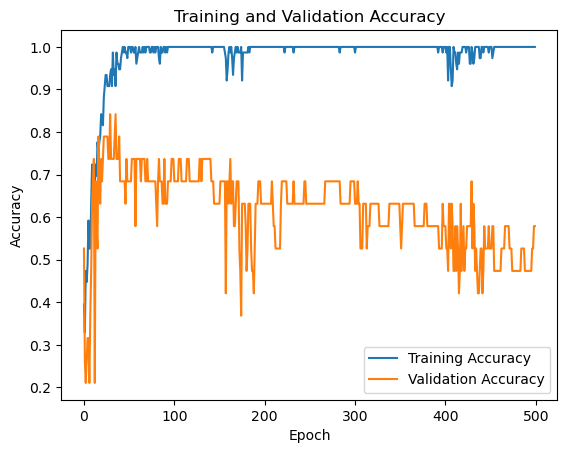

1/1 [==============================] - 1s 812ms/step


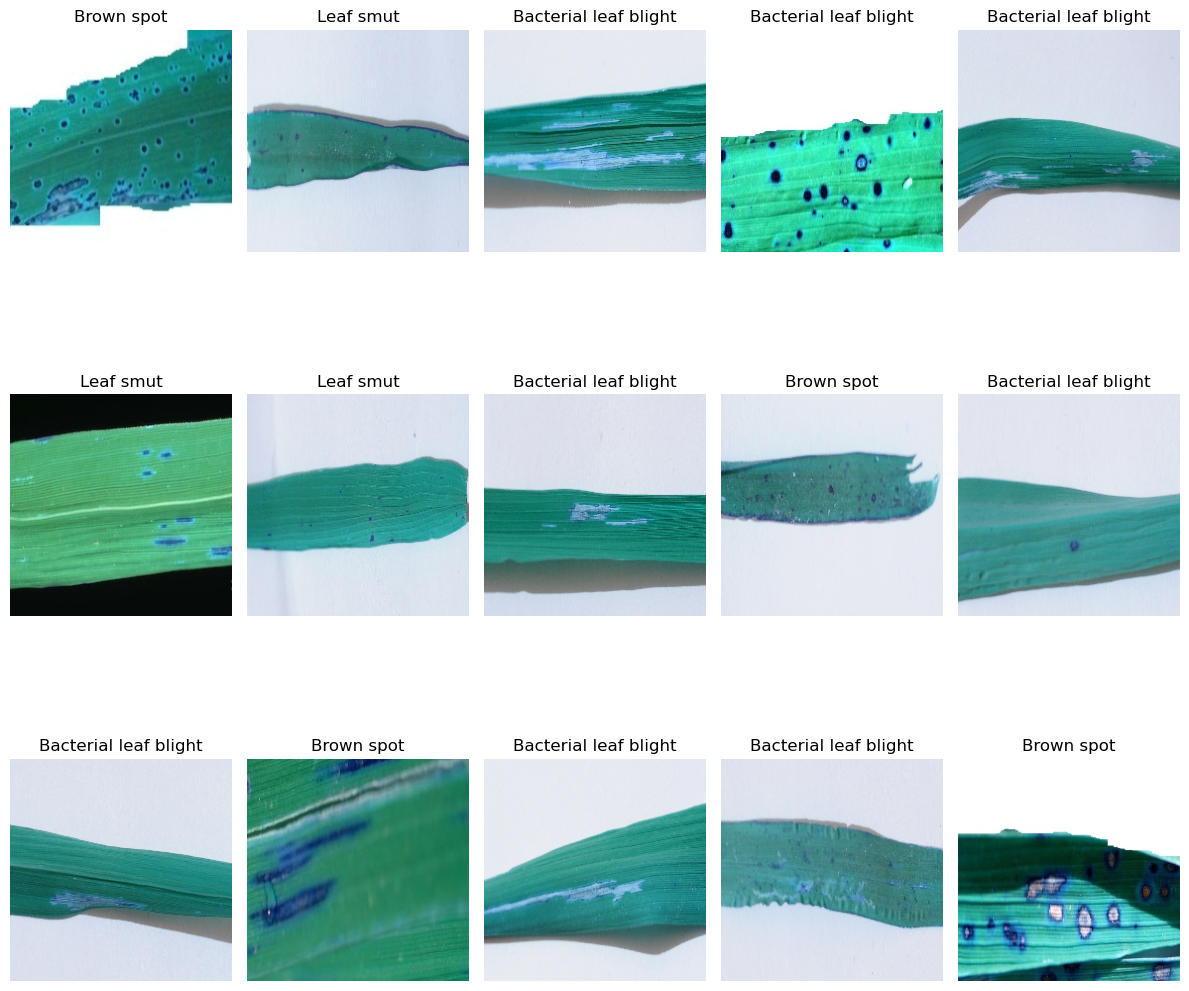

In [33]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

predicted_class_labels = label_encoder.inverse_transform(predicted_labels)

plt.figure(figsize=(12, 12))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(predicted_class_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Hyper Parameter Tuning

In [34]:
learning_rate = 0.0001

model_hp = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax') 
])

In [35]:
optimizer = Adam(learning_rate=learning_rate)

In [36]:
model_hp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model_hp.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model_hp.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/500
3/3 [==============================] - 11s 3s/step - loss: 1.3327 - accuracy: 0.2368 - val_loss: 1.2348 - val_accuracy: 0.2105
Epoch 2/500
3/3 [==============================] - 10s 3s/step - loss: 1.1108 - accuracy: 0.3289 - val_loss: 1.0882 - val_accuracy: 0.5263
Epoch 3/500
3/3 [==============================] - 10s 3s/step - loss: 1.1776 - accuracy: 0.3158 - val_loss: 1.0861 - val_accuracy: 0.4737
Epoch 4/500
3/3 [==============================] - 10s 3s/step - loss: 1.0838 - accuracy: 0.3158 - val_loss: 1.1547 - val_accuracy: 0.2105
Epoch 5/500
3/3 [==============================] - 10s 3s/step - loss: 1.1069 - accuracy: 0.3289 - val_loss: 1.2285 - val_accuracy: 0.2105
Epoch 6/500
3/3 [==============================] - 10s 3s/step - loss: 1.0911 - accuracy: 0.3553 - val_loss: 1.2456 - val_accuracy: 0.2105
Epoch 7/500
3/3 [==============================] - 10s 3s/step - loss: 1.1170 - accuracy: 0.4079 - val_loss: 1.2002 - val_accuracy: 0.2105
Epoch 8/500
3/3 [==========

Epoch 60/500
3/3 [==============================] - 9s 3s/step - loss: 0.3041 - accuracy: 0.9211 - val_loss: 1.0855 - val_accuracy: 0.4737
Epoch 61/500
3/3 [==============================] - 8s 2s/step - loss: 0.4066 - accuracy: 0.8421 - val_loss: 0.8949 - val_accuracy: 0.7368
Epoch 62/500
3/3 [==============================] - 10s 3s/step - loss: 0.4045 - accuracy: 0.8289 - val_loss: 0.9046 - val_accuracy: 0.7895
Epoch 63/500
3/3 [==============================] - 11s 3s/step - loss: 0.3457 - accuracy: 0.8816 - val_loss: 1.0719 - val_accuracy: 0.5789
Epoch 64/500
3/3 [==============================] - 10s 3s/step - loss: 0.3405 - accuracy: 0.8947 - val_loss: 1.0287 - val_accuracy: 0.5789
Epoch 65/500
3/3 [==============================] - 10s 3s/step - loss: 0.3400 - accuracy: 0.8421 - val_loss: 1.0293 - val_accuracy: 0.7368
Epoch 66/500
3/3 [==============================] - 10s 3s/step - loss: 0.3672 - accuracy: 0.8684 - val_loss: 0.9202 - val_accuracy: 0.7895
Epoch 67/500
3/3 [====

3/3 [==============================] - 10s 3s/step - loss: 0.0973 - accuracy: 1.0000 - val_loss: 1.4795 - val_accuracy: 0.6316
Epoch 119/500
3/3 [==============================] - 10s 3s/step - loss: 0.0892 - accuracy: 0.9868 - val_loss: 1.4519 - val_accuracy: 0.6316
Epoch 120/500
3/3 [==============================] - 10s 3s/step - loss: 0.1242 - accuracy: 0.9605 - val_loss: 1.5578 - val_accuracy: 0.6316
Epoch 121/500
3/3 [==============================] - 10s 3s/step - loss: 0.0507 - accuracy: 1.0000 - val_loss: 1.8691 - val_accuracy: 0.5263
Epoch 122/500
3/3 [==============================] - 10s 3s/step - loss: 0.1396 - accuracy: 0.9474 - val_loss: 1.8235 - val_accuracy: 0.4737
Epoch 123/500
3/3 [==============================] - 9s 3s/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 1.6505 - val_accuracy: 0.5789
Epoch 124/500
3/3 [==============================] - 10s 3s/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 1.6099 - val_accuracy: 0.6842
Epoch 125/500
3/3 [=========

3/3 [==============================] - 10s 3s/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 2.2710 - val_accuracy: 0.5789
Epoch 177/500
3/3 [==============================] - 10s 3s/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 2.3850 - val_accuracy: 0.5263
Epoch 178/500
3/3 [==============================] - 10s 3s/step - loss: 0.0306 - accuracy: 0.9868 - val_loss: 2.3242 - val_accuracy: 0.5263
Epoch 179/500
3/3 [==============================] - 10s 3s/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 2.2490 - val_accuracy: 0.6316
Epoch 180/500
3/3 [==============================] - 9s 3s/step - loss: 0.0464 - accuracy: 0.9868 - val_loss: 2.1761 - val_accuracy: 0.6316
Epoch 181/500
3/3 [==============================] - 9s 3s/step - loss: 0.0642 - accuracy: 0.9737 - val_loss: 2.2659 - val_accuracy: 0.6842
Epoch 182/500
3/3 [==============================] - 10s 3s/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 2.3483 - val_accuracy: 0.6842
Epoch 183/500
3/3 [==========

3/3 [==============================] - 10s 3s/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 2.5679 - val_accuracy: 0.5263
Epoch 235/500
3/3 [==============================] - 10s 3s/step - loss: 0.0382 - accuracy: 0.9868 - val_loss: 2.3949 - val_accuracy: 0.5789
Epoch 236/500
3/3 [==============================] - 10s 3s/step - loss: 0.0300 - accuracy: 0.9868 - val_loss: 2.2018 - val_accuracy: 0.6316
Epoch 237/500
3/3 [==============================] - 10s 3s/step - loss: 0.0229 - accuracy: 0.9868 - val_loss: 2.0400 - val_accuracy: 0.6842
Epoch 238/500
3/3 [==============================] - 10s 3s/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 2.0723 - val_accuracy: 0.6316
Epoch 239/500
3/3 [==============================] - 10s 3s/step - loss: 0.0348 - accuracy: 0.9868 - val_loss: 2.1660 - val_accuracy: 0.5789
Epoch 240/500
3/3 [==============================] - 10s 3s/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 2.2362 - val_accuracy: 0.5263
Epoch 241/500
3/3 [========

3/3 [==============================] - 10s 3s/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 2.6106 - val_accuracy: 0.6316
Epoch 293/500
3/3 [==============================] - 10s 3s/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 2.4547 - val_accuracy: 0.6842
Epoch 294/500
3/3 [==============================] - 10s 3s/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 2.4327 - val_accuracy: 0.7368
Epoch 295/500
3/3 [==============================] - 10s 3s/step - loss: 0.0354 - accuracy: 0.9868 - val_loss: 2.7707 - val_accuracy: 0.6316
Epoch 296/500
3/3 [==============================] - 9s 3s/step - loss: 0.0314 - accuracy: 0.9868 - val_loss: 3.2531 - val_accuracy: 0.4737
Epoch 297/500
3/3 [==============================] - 9s 3s/step - loss: 0.0292 - accuracy: 0.9868 - val_loss: 3.2214 - val_accuracy: 0.4737
Epoch 298/500
3/3 [==============================] - 10s 3s/step - loss: 0.0358 - accuracy: 0.9868 - val_loss: 2.5962 - val_accuracy: 0.5789
Epoch 299/500
3/3 [==========

3/3 [==============================] - 9s 3s/step - loss: 0.0231 - accuracy: 0.9868 - val_loss: 2.8124 - val_accuracy: 0.5789
Epoch 351/500
3/3 [==============================] - 10s 3s/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 2.8773 - val_accuracy: 0.5263
Epoch 352/500
3/3 [==============================] - 10s 3s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 2.9780 - val_accuracy: 0.5263
Epoch 353/500
3/3 [==============================] - 9s 3s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 3.0540 - val_accuracy: 0.5263
Epoch 354/500
3/3 [==============================] - 10s 3s/step - loss: 0.0612 - accuracy: 0.9737 - val_loss: 2.7739 - val_accuracy: 0.5789
Epoch 355/500
3/3 [==============================] - 10s 3s/step - loss: 0.0223 - accuracy: 0.9868 - val_loss: 2.4311 - val_accuracy: 0.7368
Epoch 356/500
3/3 [==============================] - 10s 3s/step - loss: 0.0338 - accuracy: 0.9868 - val_loss: 2.4251 - val_accuracy: 0.6316
Epoch 357/500
3/3 [==========

3/3 [==============================] - 6s 2s/step - loss: 0.0370 - accuracy: 0.9737 - val_loss: 2.7428 - val_accuracy: 0.4737
Epoch 409/500
3/3 [==============================] - 7s 2s/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 2.4839 - val_accuracy: 0.5789
Epoch 410/500
3/3 [==============================] - 7s 2s/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 2.3203 - val_accuracy: 0.6316
Epoch 411/500
3/3 [==============================] - 7s 2s/step - loss: 0.0233 - accuracy: 0.9868 - val_loss: 2.2432 - val_accuracy: 0.6316
Epoch 412/500
3/3 [==============================] - 7s 2s/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 2.2941 - val_accuracy: 0.6316
Epoch 413/500
3/3 [==============================] - 7s 2s/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 2.3894 - val_accuracy: 0.6316
Epoch 414/500
3/3 [==============================] - 7s 2s/step - loss: 0.0221 - accuracy: 0.9868 - val_loss: 2.6398 - val_accuracy: 0.6316
Epoch 415/500
3/3 [===============

3/3 [==============================] - 6s 2s/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 3.8794 - val_accuracy: 0.5263
Epoch 467/500
3/3 [==============================] - 5s 2s/step - loss: 0.0316 - accuracy: 0.9868 - val_loss: 3.7421 - val_accuracy: 0.5263
Epoch 468/500
3/3 [==============================] - 6s 2s/step - loss: 0.0264 - accuracy: 0.9868 - val_loss: 3.5598 - val_accuracy: 0.5263
Epoch 469/500
3/3 [==============================] - 6s 2s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.4125 - val_accuracy: 0.5263
Epoch 470/500
3/3 [==============================] - 7s 2s/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.3515 - val_accuracy: 0.5263
Epoch 471/500
3/3 [==============================] - 7s 2s/step - loss: 0.0293 - accuracy: 0.9868 - val_loss: 3.4426 - val_accuracy: 0.5263
Epoch 472/500
3/3 [==============================] - 6s 2s/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 3.5545 - val_accuracy: 0.5263
Epoch 473/500
3/3 [===============

# Hyper Parameter Tuning with Data Augmentation

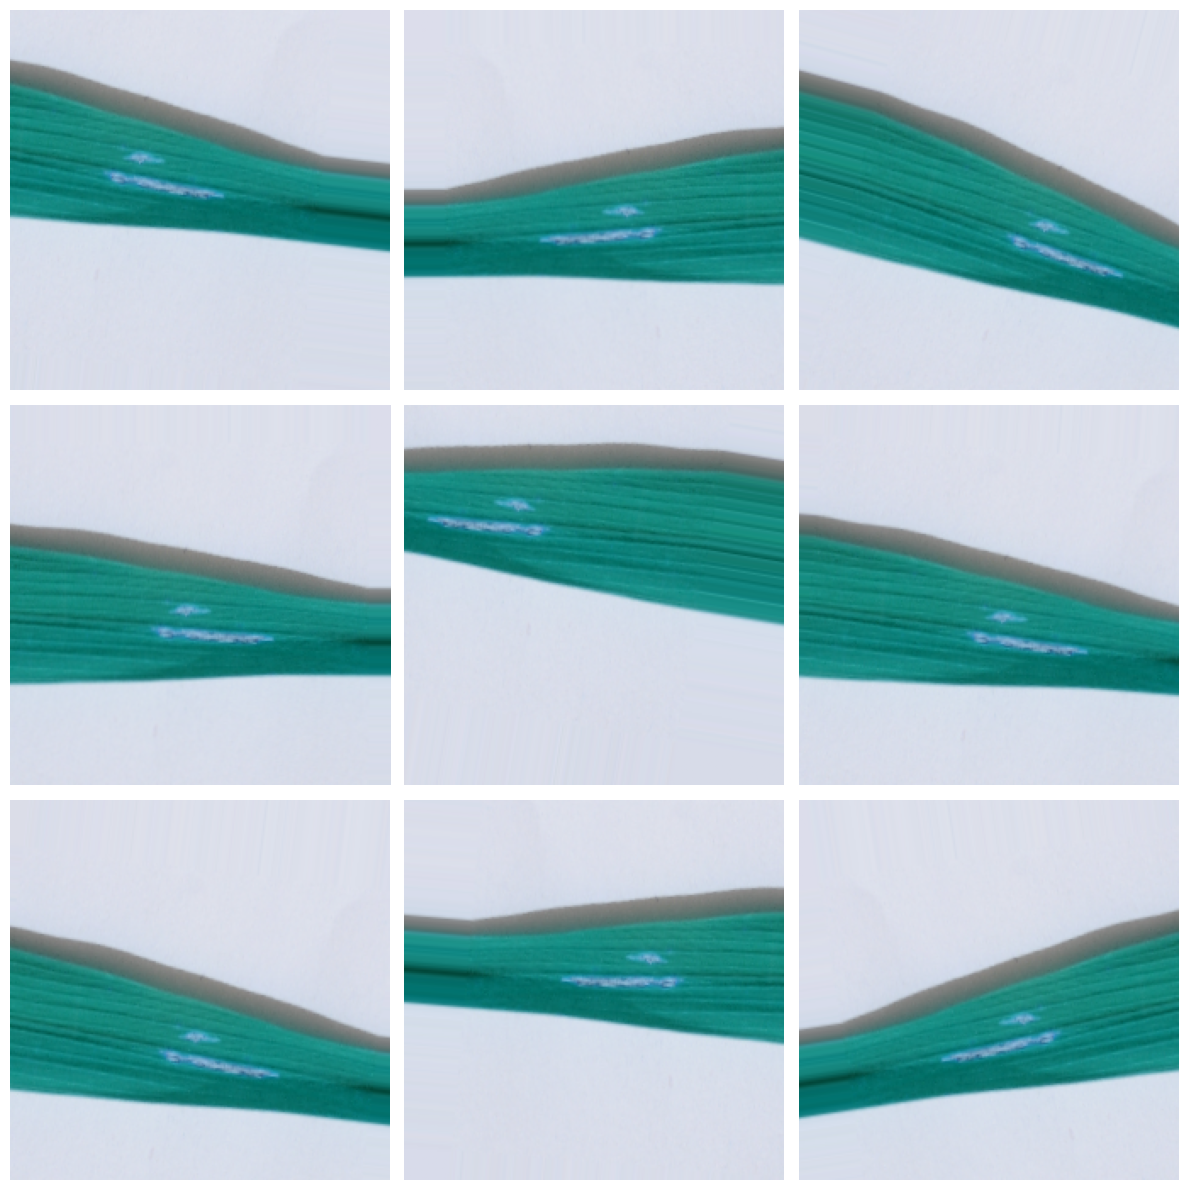

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

sample_image = x_image[2]
sample_image = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(12, 12))
for i, augmented_image in enumerate(data_generator.flow(sample_image, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')
    if i == 8:
        break
plt.tight_layout()
plt.show()


In [39]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [41]:
input_shape = (224, 224, 3)
num_classes = len(label_encoder.classes_)
model_da = create_model(input_shape, num_classes)

In [42]:
augmented_data = datagen.flow(x_train, y_train, batch_size=32)

In [45]:
history = model_da.fit(augmented_data, epochs=500, steps_per_epoch=len(x_train) // 32, validation_data=(x_test, y_test))

Epoch 1/500
2/2 [==============================] - 6s 3s/step - loss: 0.8411 - accuracy: 0.6032 - val_loss: 0.6085 - val_accuracy: 0.7500
Epoch 2/500
2/2 [==============================] - 7s 4s/step - loss: 0.7591 - accuracy: 0.6984 - val_loss: 0.5812 - val_accuracy: 0.8333
Epoch 3/500
2/2 [==============================] - 6s 3s/step - loss: 0.8149 - accuracy: 0.5873 - val_loss: 0.6327 - val_accuracy: 0.7917
Epoch 4/500
2/2 [==============================] - 6s 3s/step - loss: 0.6920 - accuracy: 0.7619 - val_loss: 0.5746 - val_accuracy: 0.8333
Epoch 5/500
2/2 [==============================] - 6s 3s/step - loss: 0.8214 - accuracy: 0.6406 - val_loss: 0.5755 - val_accuracy: 0.7917
Epoch 6/500
2/2 [==============================] - 6s 3s/step - loss: 0.7530 - accuracy: 0.6719 - val_loss: 0.5416 - val_accuracy: 0.7917
Epoch 7/500
2/2 [==============================] - 6s 3s/step - loss: 0.8254 - accuracy: 0.5469 - val_loss: 0.5804 - val_accuracy: 0.8333
Epoch 8/500
2/2 [=================

2/2 [==============================] - 6s 3s/step - loss: 0.4097 - accuracy: 0.8413 - val_loss: 0.4746 - val_accuracy: 0.8750
Epoch 61/500
2/2 [==============================] - 6s 3s/step - loss: 0.3726 - accuracy: 0.8254 - val_loss: 0.4095 - val_accuracy: 0.8333
Epoch 62/500
2/2 [==============================] - 7s 3s/step - loss: 0.3988 - accuracy: 0.8750 - val_loss: 0.4684 - val_accuracy: 0.7500
Epoch 63/500
2/2 [==============================] - 5s 2s/step - loss: 0.4828 - accuracy: 0.8095 - val_loss: 0.4783 - val_accuracy: 0.7500
Epoch 64/500
2/2 [==============================] - 6s 3s/step - loss: 0.3906 - accuracy: 0.8413 - val_loss: 0.4245 - val_accuracy: 0.8333
Epoch 65/500
2/2 [==============================] - 5s 3s/step - loss: 0.3644 - accuracy: 0.8413 - val_loss: 0.3920 - val_accuracy: 0.8750
Epoch 66/500
2/2 [==============================] - 6s 3s/step - loss: 0.3894 - accuracy: 0.8438 - val_loss: 0.4227 - val_accuracy: 0.8333
Epoch 67/500
2/2 [======================

Epoch 119/500
2/2 [==============================] - 10s 5s/step - loss: 0.3426 - accuracy: 0.8594 - val_loss: 0.5139 - val_accuracy: 0.8333
Epoch 120/500
2/2 [==============================] - 9s 5s/step - loss: 0.3017 - accuracy: 0.8889 - val_loss: 0.7675 - val_accuracy: 0.7083
Epoch 121/500
2/2 [==============================] - 9s 5s/step - loss: 0.3361 - accuracy: 0.8750 - val_loss: 0.5723 - val_accuracy: 0.7917
Epoch 122/500
2/2 [==============================] - 9s 4s/step - loss: 0.3165 - accuracy: 0.8254 - val_loss: 0.3747 - val_accuracy: 0.8333
Epoch 123/500
2/2 [==============================] - 9s 5s/step - loss: 0.3439 - accuracy: 0.7969 - val_loss: 0.3212 - val_accuracy: 0.8750
Epoch 124/500
2/2 [==============================] - 9s 5s/step - loss: 0.3084 - accuracy: 0.8571 - val_loss: 0.3889 - val_accuracy: 0.8750
Epoch 125/500
2/2 [==============================] - 9s 4s/step - loss: 0.2373 - accuracy: 0.9206 - val_loss: 0.4828 - val_accuracy: 0.8750
Epoch 126/500
2/2 [

2/2 [==============================] - 8s 4s/step - loss: 0.3420 - accuracy: 0.8254 - val_loss: 0.6432 - val_accuracy: 0.8333
Epoch 178/500
2/2 [==============================] - 9s 5s/step - loss: 0.3274 - accuracy: 0.8438 - val_loss: 0.4918 - val_accuracy: 0.8750
Epoch 179/500
2/2 [==============================] - 9s 5s/step - loss: 0.3254 - accuracy: 0.8889 - val_loss: 0.3464 - val_accuracy: 0.8750
Epoch 180/500
2/2 [==============================] - 9s 5s/step - loss: 0.2728 - accuracy: 0.8889 - val_loss: 0.2679 - val_accuracy: 0.9167
Epoch 181/500
2/2 [==============================] - 9s 5s/step - loss: 0.2841 - accuracy: 0.9048 - val_loss: 0.2590 - val_accuracy: 0.9167
Epoch 182/500
2/2 [==============================] - 9s 5s/step - loss: 0.2812 - accuracy: 0.9062 - val_loss: 0.2564 - val_accuracy: 0.8750
Epoch 183/500
2/2 [==============================] - 9s 5s/step - loss: 0.2358 - accuracy: 0.8889 - val_loss: 0.2968 - val_accuracy: 0.8750
Epoch 184/500
2/2 [===============

2/2 [==============================] - 10s 5s/step - loss: 0.1325 - accuracy: 0.9683 - val_loss: 0.1546 - val_accuracy: 0.8750
Epoch 236/500
2/2 [==============================] - 10s 5s/step - loss: 0.1294 - accuracy: 0.9524 - val_loss: 0.1614 - val_accuracy: 0.9583
Epoch 237/500
2/2 [==============================] - 10s 5s/step - loss: 0.1758 - accuracy: 0.9365 - val_loss: 0.1676 - val_accuracy: 0.9167
Epoch 238/500
2/2 [==============================] - 10s 5s/step - loss: 0.1273 - accuracy: 0.9524 - val_loss: 0.7307 - val_accuracy: 0.8333
Epoch 239/500
2/2 [==============================] - 10s 5s/step - loss: 0.1641 - accuracy: 0.9206 - val_loss: 0.4556 - val_accuracy: 0.9583
Epoch 240/500
2/2 [==============================] - 10s 5s/step - loss: 0.0827 - accuracy: 0.9844 - val_loss: 0.4736 - val_accuracy: 0.9167
Epoch 241/500
2/2 [==============================] - 10s 6s/step - loss: 0.1969 - accuracy: 0.9048 - val_loss: 0.5991 - val_accuracy: 0.8750
Epoch 242/500
2/2 [========

2/2 [==============================] - 10s 5s/step - loss: 0.1055 - accuracy: 0.9524 - val_loss: 1.0876 - val_accuracy: 0.9583
Epoch 294/500
2/2 [==============================] - 10s 5s/step - loss: 0.2076 - accuracy: 0.9048 - val_loss: 1.1193 - val_accuracy: 0.9583
Epoch 295/500
2/2 [==============================] - 9s 5s/step - loss: 0.1284 - accuracy: 0.9524 - val_loss: 1.2492 - val_accuracy: 0.9167
Epoch 296/500
2/2 [==============================] - 10s 5s/step - loss: 0.0807 - accuracy: 0.9844 - val_loss: 1.5149 - val_accuracy: 0.9167
Epoch 297/500
2/2 [==============================] - 9s 5s/step - loss: 0.1717 - accuracy: 0.9206 - val_loss: 1.2561 - val_accuracy: 0.9167
Epoch 298/500
2/2 [==============================] - 9s 5s/step - loss: 0.0564 - accuracy: 0.9841 - val_loss: 1.1812 - val_accuracy: 0.9167
Epoch 299/500
2/2 [==============================] - 10s 5s/step - loss: 0.1338 - accuracy: 0.9683 - val_loss: 1.2202 - val_accuracy: 0.9167
Epoch 300/500
2/2 [===========

2/2 [==============================] - 9s 5s/step - loss: 0.1134 - accuracy: 0.9683 - val_loss: 0.3096 - val_accuracy: 0.9583
Epoch 352/500
2/2 [==============================] - 9s 4s/step - loss: 0.1569 - accuracy: 0.9375 - val_loss: 0.3276 - val_accuracy: 0.9583
Epoch 353/500
2/2 [==============================] - 9s 5s/step - loss: 0.1290 - accuracy: 0.9365 - val_loss: 0.3121 - val_accuracy: 0.9583
Epoch 354/500
2/2 [==============================] - 9s 5s/step - loss: 0.1615 - accuracy: 0.9524 - val_loss: 0.3836 - val_accuracy: 0.9583
Epoch 355/500
2/2 [==============================] - 9s 5s/step - loss: 0.0589 - accuracy: 0.9841 - val_loss: 0.4771 - val_accuracy: 0.9167
Epoch 356/500
2/2 [==============================] - 9s 5s/step - loss: 0.1007 - accuracy: 0.9524 - val_loss: 0.5011 - val_accuracy: 0.9583
Epoch 357/500
2/2 [==============================] - 9s 5s/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 0.4720 - val_accuracy: 0.9583
Epoch 358/500
2/2 [===============

2/2 [==============================] - 9s 5s/step - loss: 0.0782 - accuracy: 0.9683 - val_loss: 0.5052 - val_accuracy: 0.9583
Epoch 410/500
2/2 [==============================] - 12s 8s/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.5676 - val_accuracy: 0.9583
Epoch 411/500
2/2 [==============================] - 10s 5s/step - loss: 0.0973 - accuracy: 0.9683 - val_loss: 0.5165 - val_accuracy: 0.9583
Epoch 412/500
2/2 [==============================] - 10s 6s/step - loss: 0.0896 - accuracy: 0.9841 - val_loss: 0.6208 - val_accuracy: 0.9583
Epoch 413/500
2/2 [==============================] - 9s 5s/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.8252 - val_accuracy: 0.9583
Epoch 414/500
2/2 [==============================] - 9s 5s/step - loss: 0.0908 - accuracy: 0.9524 - val_loss: 0.4381 - val_accuracy: 0.9583
Epoch 415/500
2/2 [==============================] - 10s 5s/step - loss: 0.0559 - accuracy: 0.9841 - val_loss: 0.1807 - val_accuracy: 0.9583
Epoch 416/500
2/2 [===========

2/2 [==============================] - 9s 5s/step - loss: 0.1639 - accuracy: 0.9365 - val_loss: 2.1749 - val_accuracy: 0.9167
Epoch 468/500
2/2 [==============================] - 9s 5s/step - loss: 0.2930 - accuracy: 0.9048 - val_loss: 2.7751 - val_accuracy: 0.9583
Epoch 469/500
2/2 [==============================] - 10s 5s/step - loss: 0.1560 - accuracy: 0.9365 - val_loss: 3.3230 - val_accuracy: 0.9583
Epoch 470/500
2/2 [==============================] - 10s 6s/step - loss: 0.3961 - accuracy: 0.9365 - val_loss: 1.6321 - val_accuracy: 0.9167
Epoch 471/500
2/2 [==============================] - 10s 6s/step - loss: 0.2850 - accuracy: 0.9375 - val_loss: 1.0182 - val_accuracy: 0.9167
Epoch 472/500
2/2 [==============================] - 10s 5s/step - loss: 0.1773 - accuracy: 0.9683 - val_loss: 1.0528 - val_accuracy: 0.9583
Epoch 473/500
2/2 [==============================] - 10s 5s/step - loss: 0.4382 - accuracy: 0.9048 - val_loss: 0.9619 - val_accuracy: 0.8750
Epoch 474/500
2/2 [==========

In [46]:
test_loss, test_accuracy = model_da.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 714ms/step - loss: 0.6935 - accuracy: 0.9583
Test accuracy: 0.9583
